In [2]:
import pandas as pd
import numpy as np
import tabulate as tbl

# Data

In [3]:
data = '../../data/mini_project_2/Students.csv'

In [4]:
students = pd.read_csv(data)
number_of_students = 25

In [5]:
students

,Name,School,Sex,Height,Weight,IQ,Days,Score
0,Lois,D,2,52.0,62.0,98.0,6,2
1,Judy,C,2,55.0,76.0,NaN,5,4
2,Mark,D,1,60.0,80.0,128.0,1,3
3,Ruth,C,2,57.0,71.0,99.0,4,1
4,Rick,A,1,54.0,70.0,93.0,1,1
5,Jim,C,1,54.0,63.0,113.0,17,0
6,Linda,B,2,55.0,70.0,NaN,6,2
7,Tony,A,1,50.0,54.0,85.0,8,0
8,Max,A,1,55.0,60.0,NaN,24,2
9,Ida,D,2,54.0,50.0,111.0,2,4


# 1

Constuct an estimate of the joint distribution of height and weight

In [6]:
height_endpoints = [np.min(students.Height), 52, 54, 56, np.max(students.Height)]
height_labels = ['['+str(np.min(students.Height))+' - 52)', '[52 - 54)', '[54 - 56)', '[56, '+str(np.max(students.Height))+']']
weight_endpoints = [np.min(students.Weight), 59, 66, 71, np.max(students.Weight)]
weight_labels = ['['+str(np.min(students.Weight))+' - 59)', '[59 - 66)', '[66 - 71)', '[71, '+str(np.max(students.Weight))+']']

In [65]:
def heightbins(h):
    if h<52:
        return height_labels[0]
    elif h<54:
        return height_labels[1]
    elif h<56:
        return height_labels[2]
    elif h<60:
        return height_labels[3]

In [68]:
def weightbins(h):
    if h<59:
        return weight_labels[0]
    elif h<66:
        return weight_labels[1]
    elif h<71:
        return weight_labels[2]
    elif h<98:
        return weight_labels[3]

In [72]:
students['heights'] = [heightbins(h) for h in students.Height]
students['weights'] = [weightbins(h) for h in students.Weight]

In [73]:
HWDistTable = pd.crosstab(students["heights"], students["weights"], margins=True, normalize=True)

In [74]:
HWDistTable

weights,[50.0 - 59),[59 - 66),[66 - 71),"[71, 98.0]",All
heights,,,,,
[49.0 - 52),0.136364,0.090909,0.000000,0.000000,0.227273
[52 - 54),0.090909,0.045455,0.090909,0.000000,0.227273
[54 - 56),0.045455,0.090909,0.090909,0.090909,0.318182
"[56, 60.0]",0.000000,0.045455,0.090909,0.090909,0.227273
All,0.272727,0.272727,0.272727,0.181818,1.000000


## a

In [78]:
np.sum(HWDistTable.to_numpy()[3, 3])

0.09090909090909091

## b

In [81]:
np.sum(HWDistTable.to_numpy()[3, 4])

0.22727272727272727

## c

In [13]:
len(students.Weight[students.Weight<68])/number_of_students

0.6

## d

In [16]:
len(students[(students.Height>=52) & (students.Height<56) & (students.Weight>=66)])/number_of_students

0.24

# 2

In [18]:
def scoretoscat(s):
    if s in [2, 3, 4]:
        return 'Pass'
    else:
        return 'Fail'

In [19]:
students['SCAT'] = [scoretoscat(s) for s in students.Score]

In [20]:
students

,Name,School,Sex,Height,Weight,IQ,Days,Score,SCAT
0,Lois,D,2,52.0,62.0,98.0,6,2,Pass
1,Judy,C,2,55.0,76.0,NaN,5,4,Pass
2,Mark,D,1,60.0,80.0,128.0,1,3,Pass
3,Ruth,C,2,57.0,71.0,99.0,4,1,Fail
4,Rick,A,1,54.0,70.0,93.0,1,1,Fail
5,Jim,C,1,54.0,63.0,113.0,17,0,Fail
6,Linda,B,2,55.0,70.0,NaN,6,2,Pass
7,Tony,A,1,50.0,54.0,85.0,8,0,Fail
8,Max,A,1,55.0,60.0,NaN,24,2,Pass
9,Ida,D,2,54.0,50.0,111.0,2,4,Pass


## a

In [58]:
pd.crosstab(students["SCAT"], students["School"], margins=True, normalize=True).loc[['Pass', 'Fail', 'All']]

School,A,B,C,D,All
SCAT,,,,,
Pass,0.12,0.12,0.28,0.2,0.72
Fail,0.16,0.00,0.12,0.0,0.28
All,0.28,0.12,0.40,0.2,1.00


School grade does not appear to be a clear indicator of passing SCAT

## b

In [37]:
print(np.min(students.IQ))
print(np.max(students.IQ))

83.0
140.0


In [ ]:
['[83-100]', '(100-121]', '(121-140]']

In [38]:
def iqbins(i):
    if i <= 100:
        return '[83-100]'
    elif i <=121:
        return '(100-121]'
    else:
        return '(121-140]'

In [39]:
students['iq'] = [iqbins(i) for i in students.IQ]

In [59]:
pd.crosstab(students["SCAT"], students["iq"], margins=True, normalize=True)[['[83-100]', '(100-121]', '(121-140]', 'All']].loc[['Pass', 'Fail', 'All']]

iq,[83-100],(100-121],(121-140],All
SCAT,,,,
Pass,0.16,0.32,0.24,0.72
Fail,0.16,0.08,0.04,0.28
All,0.32,0.40,0.28,1.00


Students with iqs higher than 100 pass the SCAT more frequently

## c

<AxesSubplot: >

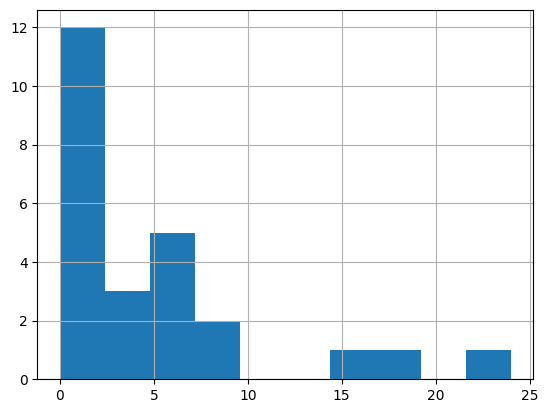

In [47]:
students.Days.hist()

In [48]:
['[0-10]', '(10-25]']

['[0-10]', '(10-25]']

In [49]:
def daybins(i):
    if i <= 10:
        return '[0-10]'
    else:
        return '(10-25]'

In [50]:
students['days'] = [daybins(i) for i in students.Days]

In [60]:
pd.crosstab(students["SCAT"], students["days"], margins=True, normalize=True)[['[0-10]', '(10-25]', 'All']].loc[['Pass', 'Fail', 'All']]

days,[0-10],(10-25],All
SCAT,,,
Pass,0.64,0.08,0.72
Fail,0.24,0.04,0.28
All,0.88,0.12,1.00


Students who spent more than 10 days studying pass the SCAT more frequently